# Homework 2: Line Detection

## Imports

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

from util import ops
from util.keypoint_detection import HessianDetector

## Load Image Data

In [2]:
original_image = ops.load_image("./original-images/road.png")

Dimensions of ./original-images/road.png: 407 x 548


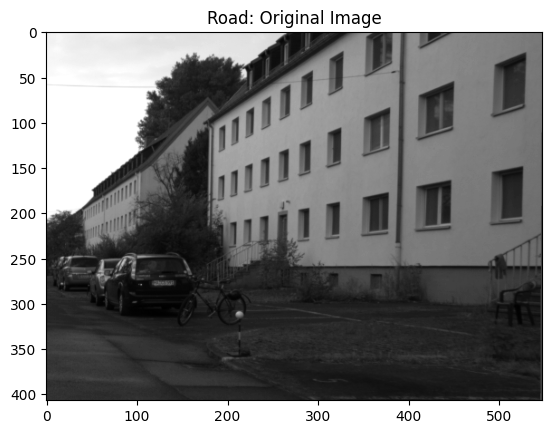

In [3]:
plt.title("Road: Original Image")
plt.imshow(original_image, cmap="gray")
plt.show()

## Problem 1: Preprocessing

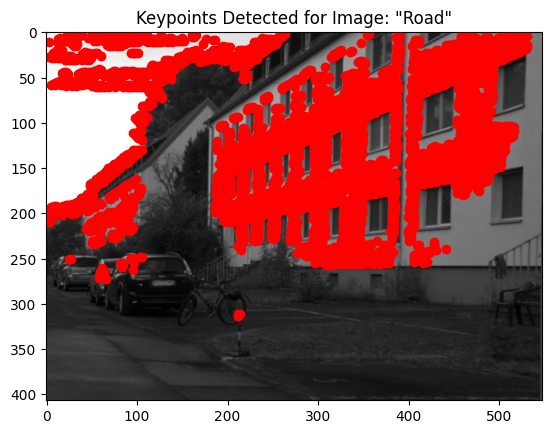

In [4]:
HessianDetector.find_keypoints_and_visualize(
    np.array(original_image), 
    "Road",
    percentile=68.05  # note: I had to run the code several times to arrive at this value
)

## Problem 2: RANSAC

### Core RANSAC Implementation Code

For convenience, let's make it so that we have a NumPy-ified version of the image on hand:

In [3]:
img_array = np.array(original_image)

Let's test out the core RANSAC algorithm implementation:

In [4]:
from util.model_fitting import RANSACDetector

In [5]:
np.random.seed(42)

In [9]:
ransac = RANSACDetector()

### Visualizing RANSAC Results

In [8]:
import functools

In [9]:
keypoint_detector = HessianDetector()

keypoint_detector_for_road = functools.partial(
    keypoint_detector.find_keypoints, percentile=68.05
)

/Users/zainraza/Downloads/dev/courses/Stevens/CS-558/Line-Detection/util/model_fitting.py:84: RuntimeWarning: divide by zero encountered in scalar divide
  m = (point2[0] - point1[0]) / (point2[1] - point1[1])
/Users/zainraza/Downloads/dev/courses/Stevens/CS-558/Line-Detection/util/model_fitting.py:64: RuntimeWarning: invalid value encountered in scalar add
  numerator = abs(a * x_coord + b * y_coord + c)


=============== Horray! You just ran RANSAC :) ===================
Inlier threshold distance: 3.0, so we can reach a confidence level of approx. 0.95.
Total number of iterations (rounded to the nearest integer): 3590.
Confidence Level used in Calculating No. of Iterations: 0.99.


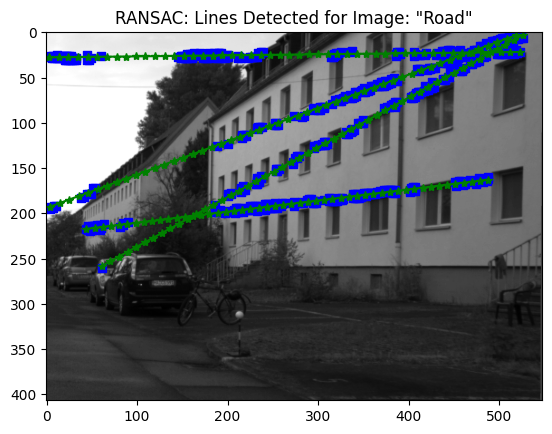

In [10]:
RANSACDetector.fit_and_report(
    image=img_array,
    keypoint_detector_algorithm=keypoint_detector_for_road,
    image_name='Road',
    distance_threshold=3.0,
)

## Problem 3: Hough Transform

In [3]:
import functools
from util.model_fitting import HessianDetector, HoughTransformDetector

In [4]:
keypoint_detector = HessianDetector()

keypoint_detector_for_road = functools.partial(
    keypoint_detector.find_keypoints, percentile=68.05
)

In [5]:
img_array = np.array(original_image)  # in case the previous cell was not run

### "Baseline" Bin Sizes

=============== You just ran a Hough Transform - I'll do my best to plot the lines! ===================
Line 1 - rho and theta bin: (0, 99) --> the line params, theta and rho, are: (1.7278759594743862, 0)
Line 2 - rho and theta bin: (217, 68) --> the line params, theta and rho, are: (1.1868238913561442, 217)
Line 3 - rho and theta bin: (233, 59) --> the line params, theta and rho, are: (1.0297442586766545, 233)
Line 4 - rho and theta bin: (0, 119) --> the line params, theta and rho, are: (2.076941809873252, 0)


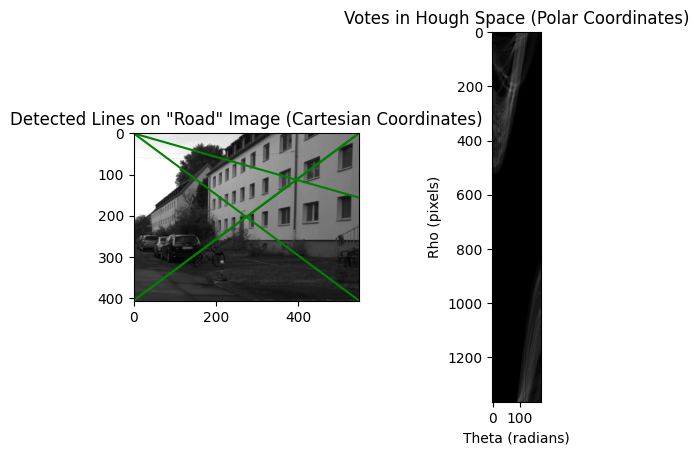

In [6]:
HoughTransformDetector.fit_and_report(
    image=img_array,
    image_name="Road",
    keypoint_detector_algorithm=keypoint_detector_for_road,
    # bin sizes
    rho_bin_size=1,
    theta_bin_size=np.pi / 180,
)

### "Half-as-Big" Bin Sizes

=============== You just ran a Hough Transform - I'll do my best to plot the lines! ===================
Line 1 - rho and theta bin: (458, 119) --> the line params, theta and rho, are: (1.038470904936626, 229.0)
Line 2 - rho and theta bin: (0, 230) --> the line params, theta and rho, are: (2.007128639793479, 0.0)
Line 3 - rho and theta bin: (0, 239) --> the line params, theta and rho, are: (2.0856684561332237, 0.0)
Line 4 - rho and theta bin: (0, 248) --> the line params, theta and rho, are: (2.1642082724729685, 0.0)


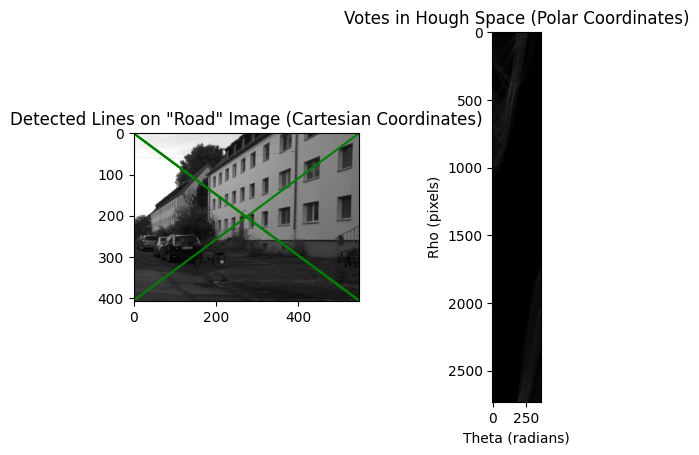

In [7]:
HoughTransformDetector.fit_and_report(
    image=img_array,
    image_name="Road",
    keypoint_detector_algorithm=keypoint_detector_for_road,
    # bin sizes
    rho_bin_size=0.5,
    theta_bin_size=np.pi / 360,
)

### "Twice-as-Big" Bin Sizes

=============== You just ran a Hough Transform - I'll do my best to plot the lines! ===================
Line 1 - rho and theta bin: (118, 29) --> the line params, theta and rho, are: (1.0122909661567112, 236)
Line 2 - rho and theta bin: (0, 47) --> the line params, theta and rho, are: (1.6406094968746698, 0)
Line 3 - rho and theta bin: (108, 34) --> the line params, theta and rho, are: (1.1868238913561442, 216)
Line 4 - rho and theta bin: (0, 59) --> the line params, theta and rho, are: (2.059488517353309, 0)


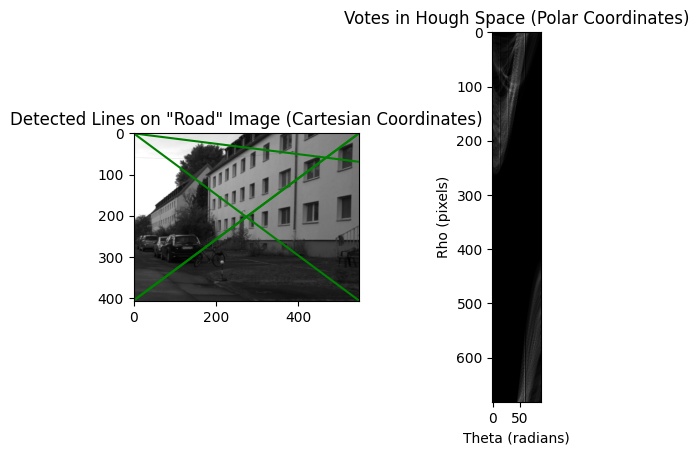

In [8]:
HoughTransformDetector.fit_and_report(
    image=img_array,
    image_name="Road",
    keypoint_detector_algorithm=keypoint_detector_for_road,
    # bin sizes
    rho_bin_size=2,
    theta_bin_size=np.pi / 90,
)